In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

#### Using glob to loop through the census files available and load them into DataFrames. 

In [3]:
files = glob.glob("states*.csv")

df_list = []
for filename in files:
  data = pd.read_csv(filename)
  df_list.append(data)

#### Concatenate all of DataFrames together into one DataFrame, called us_census.

In [5]:
us_census = pd.concat(df_list)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


#### Exploring columns and DataTypes

In [6]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [10]:
us_census.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
dtype: object

#### Using ***regex*** to turn the Income column into a format that is ready for conversion into a numerical type.

In [9]:
us_census.Income = us_census['Income'].replace('[\$,]', '', regex = True)
us_census.Income = pd.to_numeric(us_census.Income)

#### Seperating *GenderPop* column into *Men* and *Women*

In [33]:
gender_split = us_census['GenderPop'].str.split('_')
us_census['Male'] = gender_split.str.get(0)
us_census['Female'] = gender_split.str.get(1)

In [55]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913,1506295.0
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135,19334329.0


####  Deleting unwanted Rows

In [54]:
us_census = us_census.drop(['Unnamed: 0', 'GenderPop'], axis = 1)

####  Removing letters M & F trailing after the census data of GenderPop

In [35]:
us_census['Male'] = us_census['Male'].str.split('(\d+)', expand = True)[1]
us_census.Male = pd.to_numeric(us_census['Male'])

In [39]:
us_census.Male.head()

0     2341093
1      384160
2     3299088
3     1451913
4    19087135
Name: Male, dtype: int64

In [37]:
us_census['Female'] = us_census['Female'].str.split('(\d+)', expand = True)[1]
us_census.Female = pd.to_numeric(us_census['Female'])

In [77]:
us_census.Female.head()

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
Name: Female, dtype: float64

#### Checking for *NaN* values if Exist replacing them with difference of *TotalPop - Men population*

In [78]:
us_census = us_census.fillna(value={
'Female': us_census.TotalPop - us_census.Male
})

#### Dropping Duplicate Values

In [79]:
duplicates = us_census.duplicated(subset=['State'])
duplicates.value_counts()
us_census = us_census.drop_duplicates()

#### Plotting ScatterPlot again to see any changes in graph

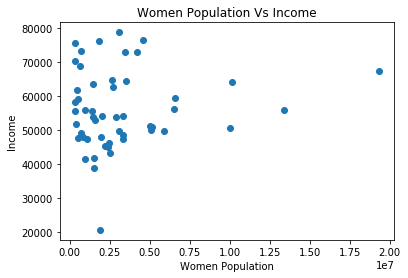

In [98]:
plt.scatter(us_census.Female, us_census.Income)
plt.xlabel('Women Population')
plt.ylabel('Income')
plt.title("Women Population Vs Income")
plt.show()

In [85]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Male', 'Female'],
      dtype='object')

#### Using ***regex*** to turn the *Races* column into a format that is ready for conversion into a numerical type by removing *%*.

In [88]:
# Hispanic 
us_census.Hispanic = us_census['Hispanic'].replace('[\%,]', '', regex = True)
us_census.Hispanic = pd.to_numeric(us_census.Hispanic)

# White
us_census.White = us_census['White'].replace('[\%,]', '', regex = True)
us_census.White = pd.to_numeric(us_census.White)

# Black
us_census.Black = us_census['Black'].replace('[\%,]', '', regex = True)
us_census.Black = pd.to_numeric(us_census.Black)

# Native
us_census.Native = us_census['Native'].replace('[\%,]', '', regex = True)
us_census.Native = pd.to_numeric(us_census.Native)

# Asian
us_census.Asian = us_census['Asian'].replace('[\%,]', '', regex = True)
us_census.Asian = pd.to_numeric(us_census.Asian)

# Pacific
us_census.Pacific = us_census['Pacific'].replace('[\%,]', '', regex = True)
us_census.Pacific = pd.to_numeric(us_census.Pacific)

us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093,2489527.0
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160,349215.0
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088,3342840.0
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913,1506295.0
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135,19334329.0


#### Checking for *NaN* values if Exist replacing them with mean

In [91]:
us_census = us_census.fillna(value={
'Hispanic': us_census.Hispanic.mean(),
'White': us_census.White.mean(),
'Black': us_census.Black.mean(),
'Native': us_census.Native.mean(),
'Asian': us_census.Asian.mean(),
'Pacific': us_census.Pacific.mean()    
    
})

#### Checking and Dropping Duplicates


In [93]:
duplicates = us_census.duplicated(subset=['State'])
duplicates.value_counts()
us_census = us_census.drop_duplicates()

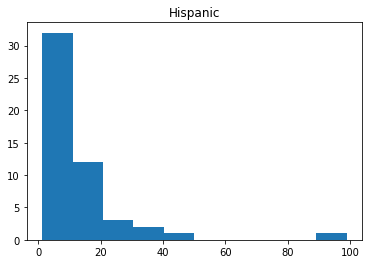

In [99]:
plt.hist(us_census["Hispanic"])
plt.title("Hispanic")
plt.show()

In [101]:
plt.hist(us_census["White"])
plt.title("White")
plt.show()


SyntaxError: invalid character in identifier (<ipython-input-101-695a7c187769>, line 2)

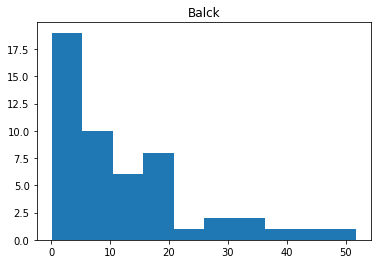

In [103]:
plt.hist(us_census["Black"])
plt.title("Balck")
plt.show()


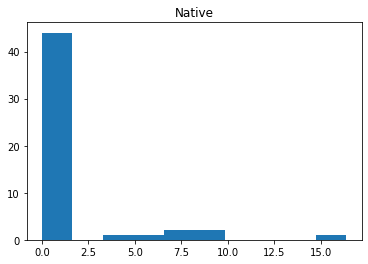

In [106]:
plt.hist(us_census["Native"])
plt.title("Native")
plt.show()


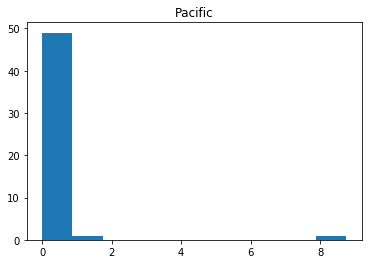

In [105]:
plt.hist(us_census["Pacific"])
plt.title("Pacific")
plt.show()


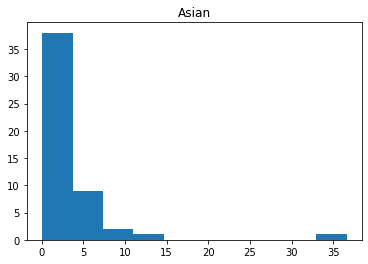

In [104]:
plt.hist(us_census["Asian"])
plt.title("Asian")
plt.show()